In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train_data = pd.read_csv('/content/train_ctrUa4K.csv',index_col='Loan_ID')
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
train_data.shape

(614, 12)

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [45]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [46]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
train_data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [48]:
train_data['Gender'].replace({'Male':1,'Female':2},inplace=True)

In [87]:
train_data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [88]:
train_data['Gender'].replace({'Graduate':1,'Not Graduate':2},inplace=True)

In [49]:
train_data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [50]:
train_data['Married'].replace({'Yes':1,'No':2},inplace=True)

In [51]:
train_data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [52]:
train_data['Dependents'].replace({'0':1,'2':2,'1':3,'3+':4},inplace=True)

In [53]:
train_data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [54]:
train_data['Self_Employed'].replace({'No':1,'Yes':2},inplace=True)

In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 62.4+ KB


In [56]:
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].median())
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].median())
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].median())
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].median())
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].median())

In [57]:
train_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

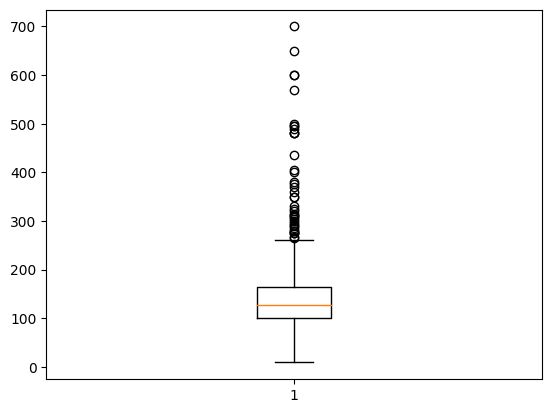

In [58]:
plt.boxplot(train_data['LoanAmount'])
plt.show()

In [59]:
Q1 = np.percentile(train_data['LoanAmount'],25,method='midpoint')
Q2 = np.percentile(train_data['LoanAmount'],50,method='midpoint')
Q3 = np.percentile(train_data['LoanAmount'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  100.5
Q2 is  128.0
Q3 is  164.5


In [60]:
IQR = Q3-Q1

print('IQR is ',IQR)

IQR is  64.0


In [61]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print("lower limit is",low_lim)
print("upper limit is",up_lim)

lower limit is 4.5
upper limit is 260.5


In [62]:
outlier=[]
for x in train_data['LoanAmount']:
  if ((x > up_lim) or (x < low_lim)):
    outlier.append(x)

outlier

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [63]:
train_data['LoanAmount'] = train_data['LoanAmount'].clip(lower=low_lim, upper=up_lim)

In [64]:
outlier=[]
for x in train_data['LoanAmount']:
  if ((x > up_lim) or (x < low_lim)):
    outlier.append(x)

outlier

[]

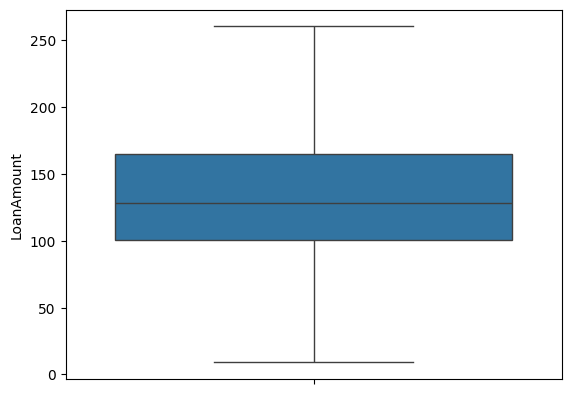

In [65]:
sns.boxplot(train_data['LoanAmount'])
plt.show()

In [82]:
y = train_data['LoanAmount']
X = train_data.drop(['LoanAmount'],axis=1)

In [83]:
X.shape

(614, 11)

In [84]:
y.shape

(614,)

In [85]:
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(614, 1)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

ValueError: could not convert string to float: 'Graduate'